In [ ]:
# Time Series Forecasting
## ARIMA - Auto Regressive Integrated Moving Average
### Durbin watson value should be either less than 1.5 or more than 2.5
### There must be date and time column
### Date column should be in sequence order
### There should not be any missing data - imputation method
### check whether we have trend, seasonality, cyclical and random noise - decomposition method
### Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction)
### Time Series Forecasting predicted value should be "Stationary" - Augmented Dickey Fuller Test or Rolling method

# Import the required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

In [3]:
df = pd.read_csv('datasets_302666_618181_AAPL.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
5,8/22/2018,214.100006,216.360001,213.839996,215.050003,211.763901,19018100
6,8/23/2018,214.649994,217.050003,214.600006,215.490005,212.197189,18883200
7,8/24/2018,216.600006,216.899994,215.110001,216.160004,212.856949,18476400
8,8/27/2018,217.149994,218.740005,216.330002,217.940002,214.609741,20525100
9,8/28/2018,219.009995,220.539993,218.919998,219.699997,216.342850,22776800


In [5]:
from pandas.tseries.offsets import BDay

In [7]:
df.shape

(251, 7)

In [9]:
df_date = df[['Date','Volume']]

In [11]:
df_date.tail()

,Date,Volume
246,8/8/2019,27009500
247,8/9/2019,24619700
248,8/12/2019,22474900
249,8/13/2019,47218500
250,8/14/2019,36453100


In [13]:
date1 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=BDay())

In [15]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [17]:
len(date1)

261

In [19]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [20]:
date2 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)

In [21]:
date2

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [25]:
len(date2)

251

In [29]:
df_date['Time_Stamp'] = pd.DataFrame(date2, columns=['Date'])
df_date['Open'] = pd.DataFrame(df, columns=['Open'])

In [31]:
df_date

,Date,Volume,Time_Stamp,Open
0,8/15/2018,28807600,2018-08-15,209.220001
1,8/16/2018,28500400,2018-08-16,211.750000
2,8/17/2018,35427000,2018-08-17,213.440002
3,8/20/2018,30287700,2018-08-20,218.100006
4,8/21/2018,26159800,2018-08-21,216.800003
...,...,...,...,...
246,8/8/2019,27009500,2019-08-08,200.199997
247,8/9/2019,24619700,2019-08-09,201.300003
248,8/12/2019,22474900,2019-08-12,199.619995
249,8/13/2019,47218500,2019-08-13,201.020004


In [33]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    object        
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
 3   Open        251 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.0+ KB


In [45]:
df_date.isnull().sum()

Date          0
Volume        0
Time_Stamp    0
dtype: int64

In [35]:
# Durbin Watson Test
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Volume'])

0.13804147049471416

In [37]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Open'])

0.0003174209031518406

In [ ]:
### Durbin watson value should be either less than 1.5 or more than 2.5 - Satisfied
### There must be date and time column - satisfied
### Date column should be in sequence order - Satisfied
### There should not be any missing data - imputation method - Satisfied 
### check whether we have trend, seasonality, cyclicity and random noise - decomposition method - checked and we have trend and seasonality there
### Time Series Forecasting value should be numeric and atleast 2 column (one datetime and 2nd prediction) - Satisfied
### Time Series Forecasting predicted value should be "Stationary" - Augmented Dickey Fuller Test or Rolling method

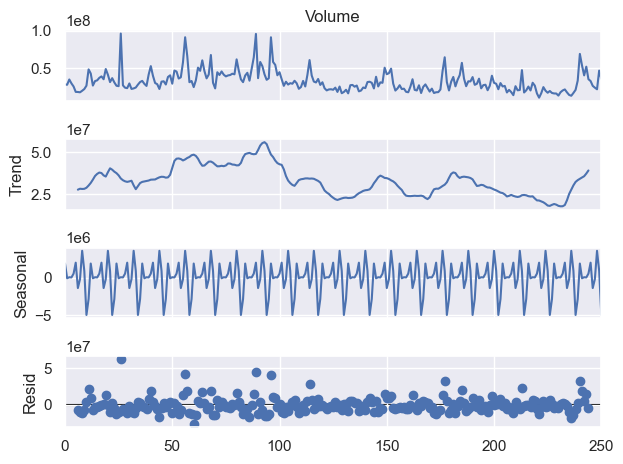

In [39]:
# Decomposition method
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_date['Volume'], period=12)
decomposition.plot()
plt.show()

In [41]:
df_date['Date'] = pd.to_datetime(df_date['Date'])

In [43]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
 3   Open        251 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 8.0 KB


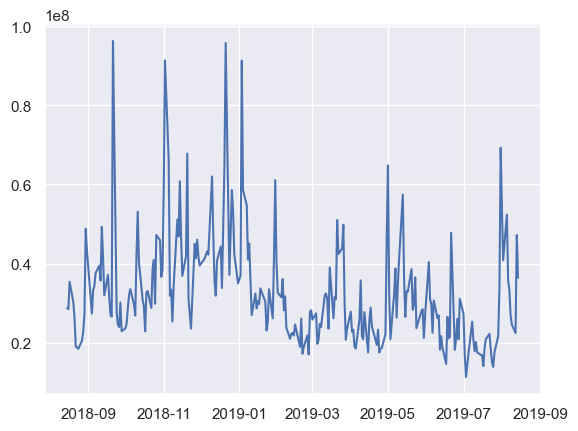

In [45]:
plt.plot(df_date['Date'], df_date['Volume'])
plt.show()

In [49]:
df_date['Volume'].describe()

count    2.510000e+02
mean     3.289967e+07
std      1.385336e+07
min      1.136200e+07
25%      2.329740e+07
50%      2.985580e+07
75%      3.927970e+07
max      9.624670e+07
Name: Volume, dtype: float64

In [53]:
# another method of importing dataset
df_final = pd.read_csv('datasets_302666_618181_AAPL.csv', parse_dates=True, index_col=0)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


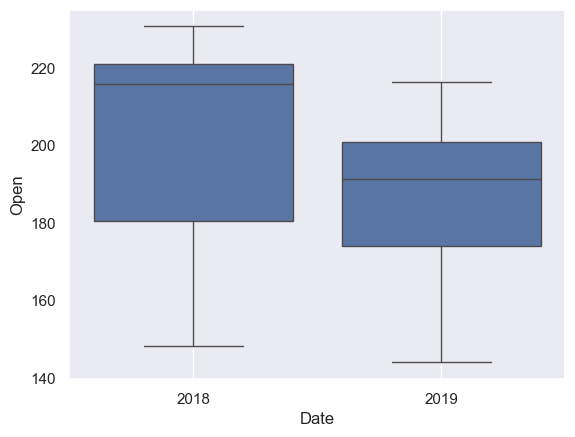

In [57]:
sns.boxplot(x=df_final.index.year, y= df_final['Open'])
plt.grid()

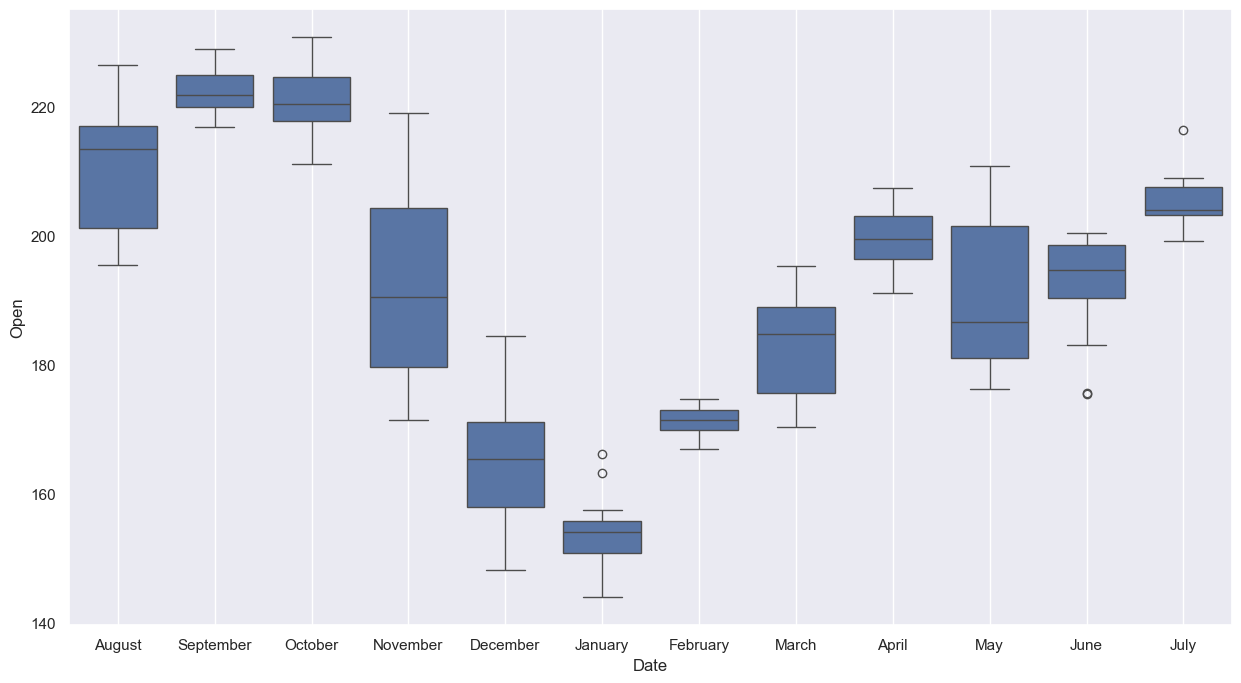

In [63]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
sns.boxplot(x=df_final.index.month_name(), y= df_final['Open'])
plt.grid()

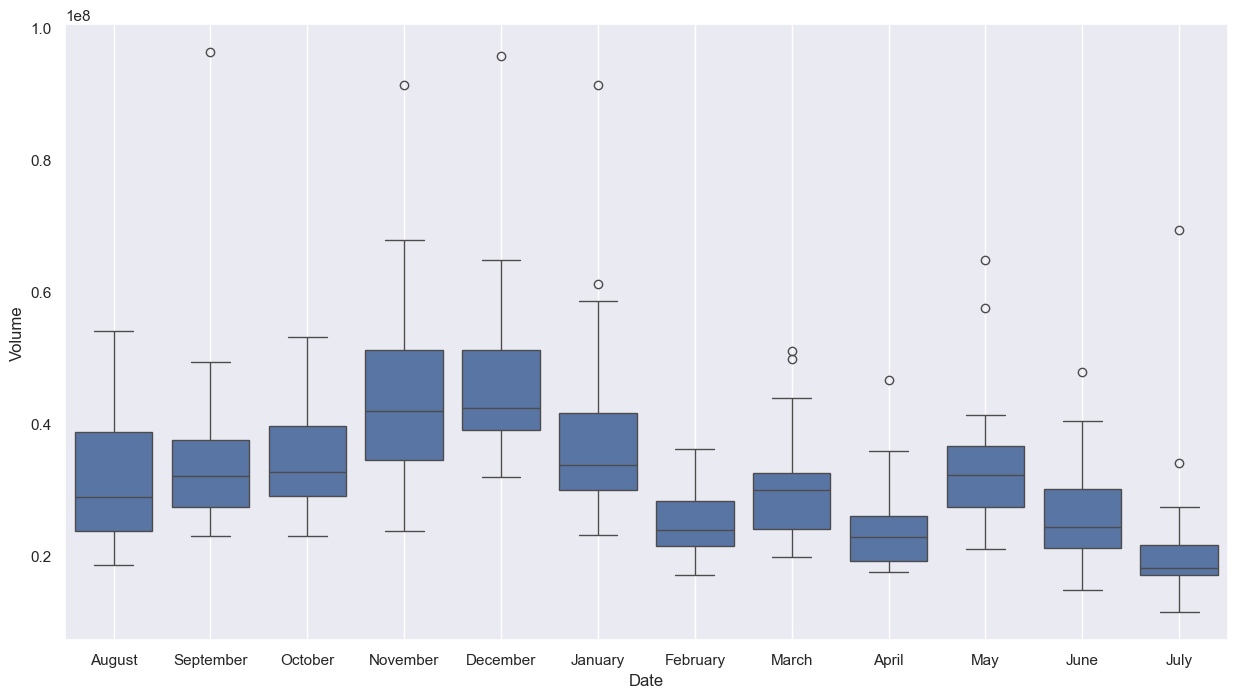

In [65]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
sns.boxplot(x=df_final.index.month_name(), y= df_final['Volume'])
plt.grid()

In [67]:
df_final['Month'] = df_final.index.month
df_final['Year'] = df_final.index.year

In [69]:
df_final

,Open,High,Low,Close,Adj Close,Volume,Month,Year
Date,,,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018
...,...,...,...,...,...,...,...,...
2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500,8,2019
2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700,8,2019
2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900,8,2019


In [73]:
df['Time_Stamp'] = pd.to_datetime(df['Date'])
df_final_model = df.set_index('Time_Stamp')
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
...,...,...,...,...,...,...,...
2019-08-08,8/8/2019,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,8/9/2019,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,8/12/2019,199.619995,202.050003,199.149994,200.479996,200.479996,22474900


In [77]:
df_final_model['Date'] = pd.to_datetime(df_final_model['Date'])
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


In [79]:
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [81]:
df_final_model.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2019-08-08,2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900
2019-08-13,2019-08-13,201.020004,212.139999,200.479996,208.970001,208.970001,47218500
2019-08-14,2019-08-14,203.160004,206.440002,202.589996,202.750000,202.750000,36453100


In [95]:
len(df_final_model)

251

In [105]:
# very important point
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2019-06-05')]
train.shape

(201, 7)

In [107]:
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-05')]
test.shape

(50, 7)

In [109]:
train_final = train[['Volume']]
test_final = test[['Volume']]

In [111]:
train_final.head()

,Volume
Time_Stamp,
2018-08-15,28807600
2018-08-16,28500400
2018-08-17,35427000
2018-08-20,30287700
2018-08-21,26159800


In [113]:
train_final.tail()

,Volume
Time_Stamp,
2019-05-29,28481200
2019-05-30,21218400
2019-05-31,27043600
2019-06-03,40396100
2019-06-04,30968000


In [115]:
test_final.head()

,Volume
Time_Stamp,
2019-06-05,29773400
2019-06-06,22526300
2019-06-07,30684400
2019-06-10,26220900
2019-06-11,26932900


In [117]:
test_final.tail()

,Volume
Time_Stamp,
2019-08-08,27009500
2019-08-09,24619700
2019-08-12,22474900
2019-08-13,47218500
2019-08-14,36453100


# Automation method - Facebook Prophet model

In [128]:
!pip install prophet

In [130]:
import prophet

In [140]:
from prophet import Prophet

In [132]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [142]:
model = Prophet()

In [144]:
df_final_model.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [146]:
df_final_model_1 = df_final_model[['Date','Volume']]
df_final_model_1

,Date,Volume
Time_Stamp,,
2018-08-15,2018-08-15,28807600
2018-08-16,2018-08-16,28500400
2018-08-17,2018-08-17,35427000
2018-08-20,2018-08-20,30287700
2018-08-21,2018-08-21,26159800
...,...,...
2019-08-08,2019-08-08,27009500
2019-08-09,2019-08-09,24619700
2019-08-12,2019-08-12,22474900


In [148]:
df_final_model_1.columns = ['ds','y']

In [152]:
df_final_model_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      251 non-null    datetime64[ns]
 1   y       251 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 KB


In [154]:
model.fit(df_final_model_1)

21:34:51 - cmdstanpy - INFO - Chain [1] start processing
21:34:53 - cmdstanpy - INFO - Chain [1] done processing


In [156]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [158]:
df_final_model_1.tail()

,ds,y
Time_Stamp,,
2019-08-08,2019-08-08,27009500
2019-08-09,2019-08-09,24619700
2019-08-12,2019-08-12,22474900
2019-08-13,2019-08-13,47218500
2019-08-14,2019-08-14,36453100


In [164]:
future_dates = model.make_future_dataframe(periods=1000)
future_dates.tail()

,ds
1246,2022-05-06
1247,2022-05-07
1248,2022-05-08
1249,2022-05-09
1250,2022-05-10


In [166]:
predict = model.predict(future_dates)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-15,3.518019e+07,1.915885e+07,5.212236e+07,3.518019e+07,3.518019e+07,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,0.0,0.0,0.0,3.575764e+07
1,2018-08-16,3.519278e+07,2.000907e+07,5.359301e+07,3.519278e+07,3.519278e+07,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,0.0,0.0,0.0,3.629997e+07
2,2018-08-17,3.520538e+07,2.218121e+07,5.421944e+07,3.520538e+07,3.520538e+07,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,3.822372e+07
3,2018-08-20,3.524315e+07,2.013142e+07,5.449550e+07,3.524315e+07,3.524315e+07,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,3.667853e+07
4,2018-08-21,3.525575e+07,1.817841e+07,5.264269e+07,3.525575e+07,3.525575e+07,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,0.0,0.0,0.0,3.550325e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2022-05-06,-2.592481e+07,-4.972800e+07,3.623494e+06,-4.674173e+07,-5.114717e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,-2.290647e+07
1247,2022-05-07,-2.597456e+07,-5.503201e+07,-2.716120e+06,-4.682101e+07,-5.133763e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,0.0,0.0,0.0,-2.916749e+07
1248,2022-05-08,-2.602430e+07,-5.543331e+07,-2.010980e+06,-4.690029e+07,-5.152810e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,0.0,0.0,0.0,-2.921723e+07
1249,2022-05-09,-2.607405e+07,-5.185728e+07,2.576718e+06,-4.698025e+07,-5.171856e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,-2.463867e+07


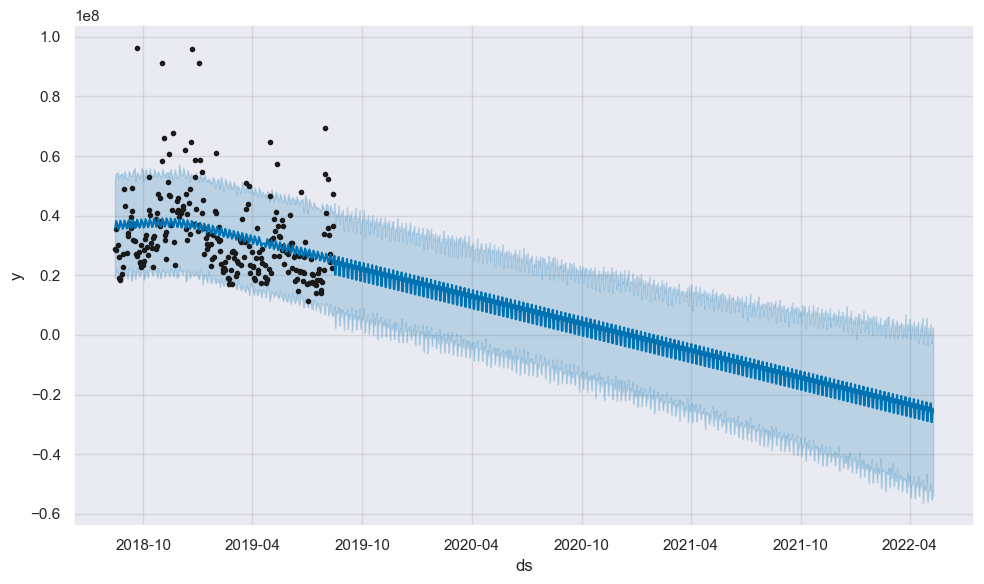

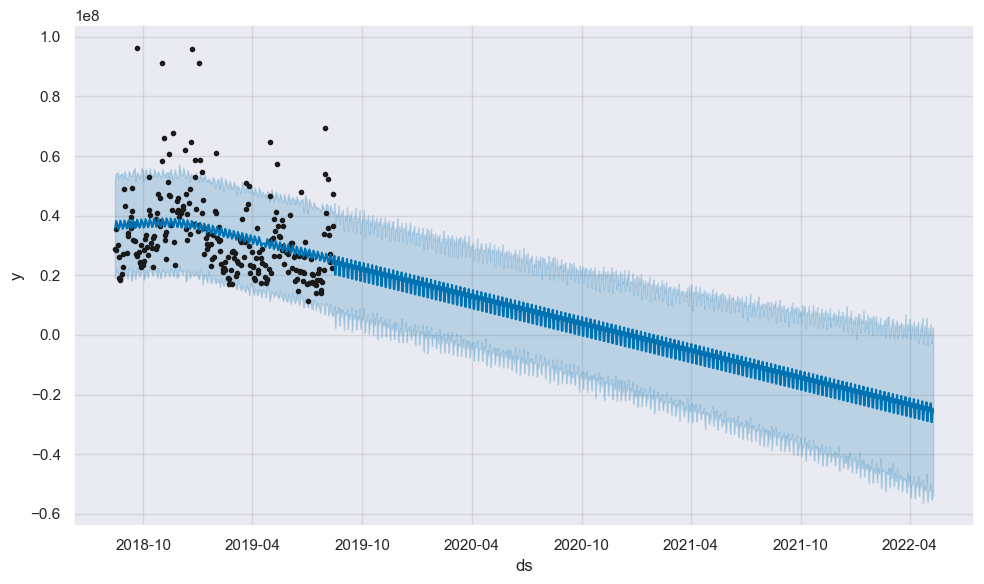

In [168]:
model.plot(predict)

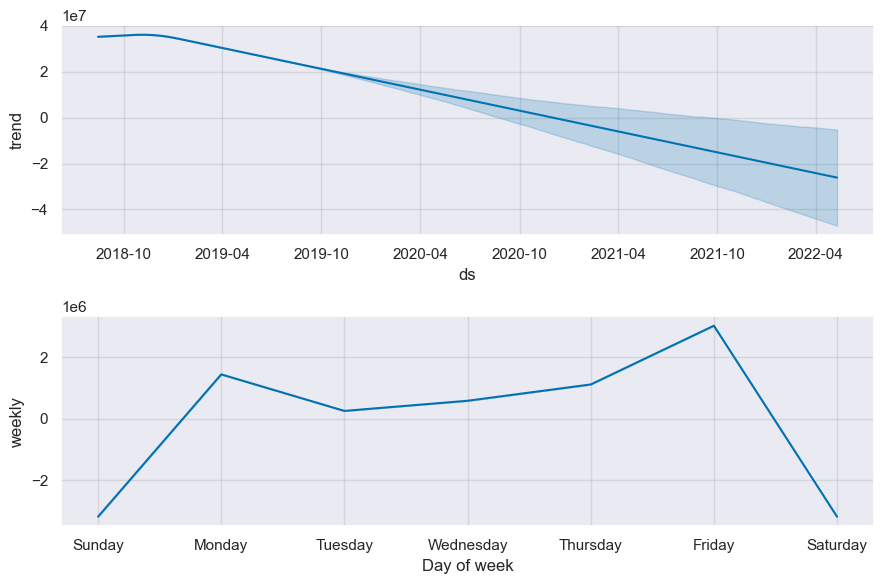

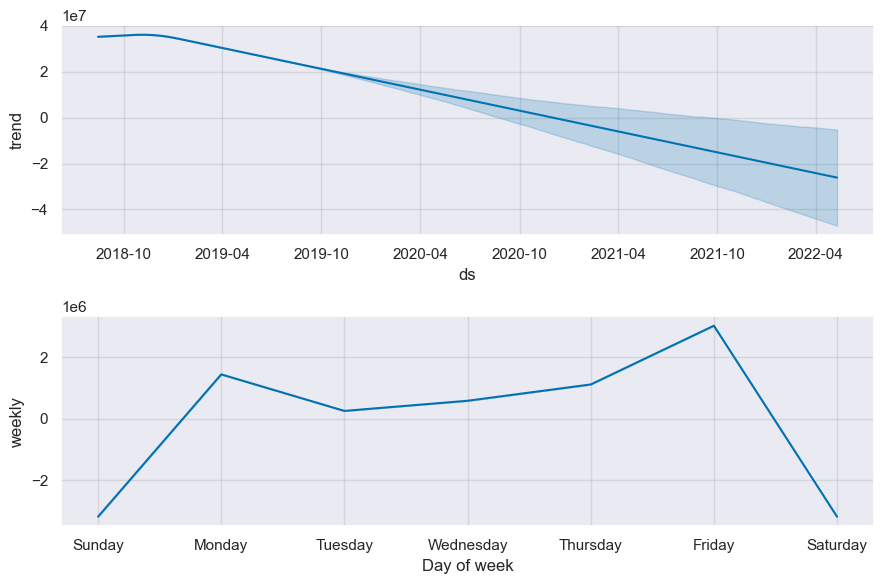

In [170]:
model.plot_components(predict)

In [172]:
new_data = pd.read_csv('RELCHEMQ-EQ.csv')
new_data.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,27-Mar-2025,EQ,158.39,160.00,154.56,157.64,157.0,158.31,157.30,260.0,146.51,"27,442","43,16,605.65",495
1,26-Mar-2025,EQ,160.40,160.40,156.31,159.63,157.1,157.64,157.73,260.0,146.51,"15,389","24,27,231.19",364
2,25-Mar-2025,EQ,160.00,164.90,159.00,160.20,159.0,159.63,161.48,260.0,146.51,"30,216","48,79,289.59",685
3,24-Mar-2025,EQ,160.37,166.00,159.20,160.37,159.2,160.20,162.38,260.0,146.51,"11,828","19,20,663.42",916
4,21-Mar-2025,EQ,163.00,163.49,159.10,161.09,159.8,160.37,160.91,260.0,146.51,"14,942","24,04,387.61",401


In [182]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           250 non-null    datetime64[ns]
 1   series         250 non-null    object        
 2   OPEN           250 non-null    float64       
 3   HIGH           250 non-null    float64       
 4   LOW            250 non-null    float64       
 5   PREV. CLOSE    250 non-null    float64       
 6   ltp            250 non-null    float64       
 7   close          250 non-null    float64       
 8   vwap           250 non-null    float64       
 9   52W H          250 non-null    float64       
 10  52W L          250 non-null    float64       
 11  VOLUME         250 non-null    object        
 12  VALUE          250 non-null    object        
 13  No of trades   250 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 27.5+ KB


In [178]:
new_data.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [180]:
new_data['Date '] = pd.to_datetime(new_data['Date '])

In [184]:
new_data = new_data[['Date ','OPEN ']]

In [186]:
new_data.columns = ['ds','y']

In [188]:
new_data

,ds,y
0,2025-03-27,158.39
1,2025-03-26,160.40
2,2025-03-25,160.00
3,2025-03-24,160.37
4,2025-03-21,163.00
...,...,...
245,2024-04-03,206.75
246,2024-04-02,205.00
247,2024-04-01,201.00
248,2024-03-28,203.50


In [193]:
model = Prophet()

In [195]:
model.fit(new_data)

21:46:50 - cmdstanpy - INFO - Chain [1] start processing
21:46:51 - cmdstanpy - INFO - Chain [1] done processing


In [197]:
future_dates = model.make_future_dataframe(periods=100)
future_dates

,ds
0,2024-03-27
1,2024-03-28
2,2024-04-01
3,2024-04-02
4,2024-04-03
...,...
345,2025-07-01
346,2025-07-02
347,2025-07-03
348,2025-07-04


In [199]:
predictions = model.predict(future_dates)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-03-27,213.315042,202.231566,225.964569,213.315042,213.315042,0.767882,0.767882,0.767882,0.767882,0.767882,0.767882,0.0,0.0,0.0,214.082924
1,2024-03-28,213.378544,204.935433,226.740144,213.378544,213.378544,2.811546,2.811546,2.811546,2.811546,2.811546,2.811546,0.0,0.0,0.0,216.190091
2,2024-04-01,213.632554,205.629593,228.818566,213.632554,213.632554,3.816861,3.816861,3.816861,3.816861,3.816861,3.816861,0.0,0.0,0.0,217.449415
3,2024-04-02,213.696056,204.641935,227.951051,213.696056,213.696056,2.354069,2.354069,2.354069,2.354069,2.354069,2.354069,0.0,0.0,0.0,216.050125
4,2024-04-03,213.759559,203.117495,226.745221,213.759559,213.759559,0.767882,0.767882,0.767882,0.767882,0.767882,0.767882,0.0,0.0,0.0,214.527440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2025-07-01,86.862805,72.223339,105.856168,74.793100,98.660687,2.354069,2.354069,2.354069,2.354069,2.354069,2.354069,0.0,0.0,0.0,89.216874
346,2025-07-02,86.184773,69.962757,104.130504,73.908993,98.219447,0.767882,0.767882,0.767882,0.767882,0.767882,0.767882,0.0,0.0,0.0,86.952655
347,2025-07-03,85.506741,70.999551,106.077484,73.084368,97.778208,2.811546,2.811546,2.811546,2.811546,2.811546,2.811546,0.0,0.0,0.0,88.318287
348,2025-07-04,84.828709,69.729727,106.178690,72.196777,97.480000,3.744428,3.744428,3.744428,3.744428,3.744428,3.744428,0.0,0.0,0.0,88.573137


In [211]:
predictions.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [213]:
df_var = predictions[['ds','yhat_lower', 'yhat_upper','yhat']]

In [215]:
df_var

,ds,yhat_lower,yhat_upper,yhat
0,2024-03-27,202.231566,225.964569,214.082924
1,2024-03-28,204.935433,226.740144,216.190091
2,2024-04-01,205.629593,228.818566,217.449415
3,2024-04-02,204.641935,227.951051,216.050125
4,2024-04-03,203.117495,226.745221,214.527440
...,...,...,...,...
345,2025-07-01,72.223339,105.856168,89.216874
346,2025-07-02,69.962757,104.130504,86.952655
347,2025-07-03,70.999551,106.077484,88.318287
348,2025-07-04,69.729727,106.178690,88.573137


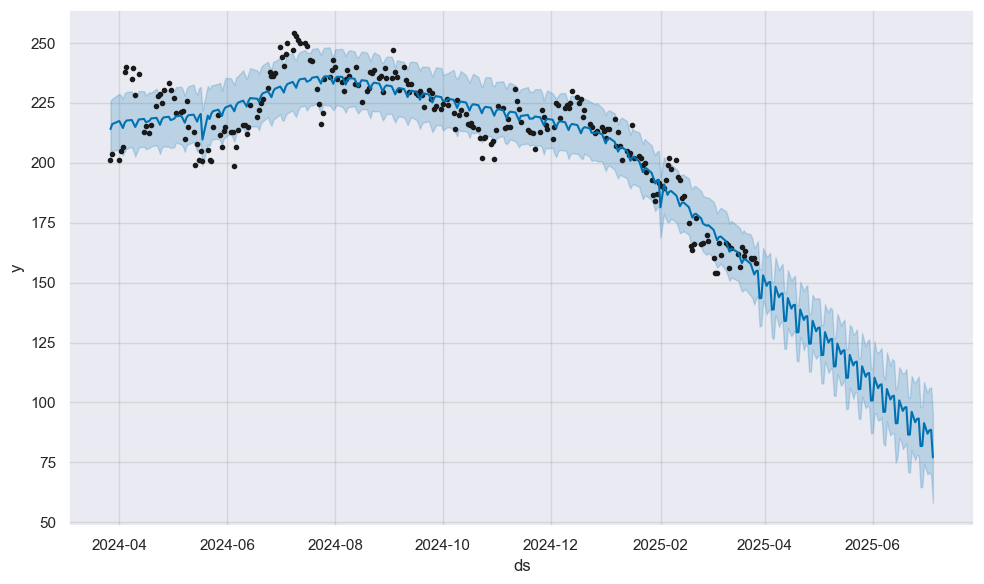

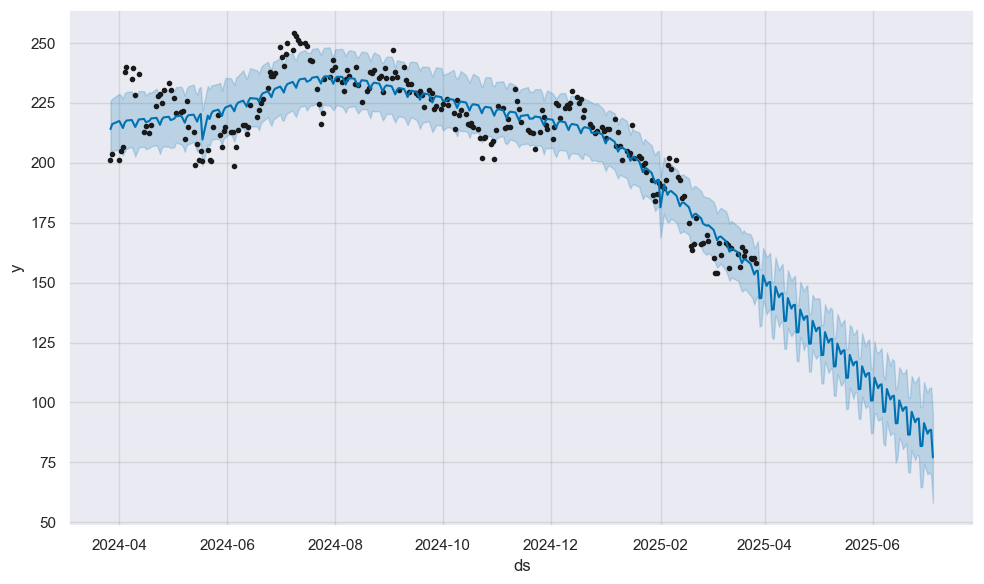

In [201]:
model.plot(predictions)

In [219]:
from prophet.diagnostics import performance_metrics, cross_validation

In [234]:
df_cv = cross_validation(model, initial='200 days', period = '10 days', horizon='100 days')

  0%|          | 0/7 [00:00<?, ?it/s]

22:00:57 - cmdstanpy - INFO - Chain [1] start processing
22:00:57 - cmdstanpy - INFO - Chain [1] done processing
22:00:57 - cmdstanpy - INFO - Chain [1] start processing
22:00:57 - cmdstanpy - INFO - Chain [1] done processing
22:00:57 - cmdstanpy - INFO - Chain [1] start processing
22:00:58 - cmdstanpy - INFO - Chain [1] done processing
22:00:58 - cmdstanpy - INFO - Chain [1] start processing
22:00:58 - cmdstanpy - INFO - Chain [1] done processing
22:00:58 - cmdstanpy - INFO - Chain [1] start processing
22:00:58 - cmdstanpy - INFO - Chain [1] done processing
22:00:58 - cmdstanpy - INFO - Chain [1] start processing
22:00:58 - cmdstanpy - INFO - Chain [1] done processing
22:00:59 - cmdstanpy - INFO - Chain [1] start processing
22:00:59 - cmdstanpy - INFO - Chain [1] done processing


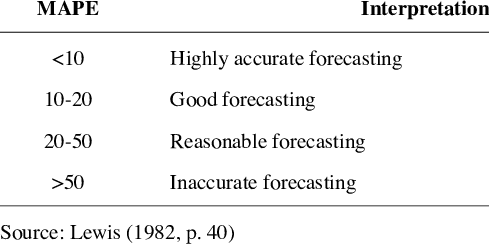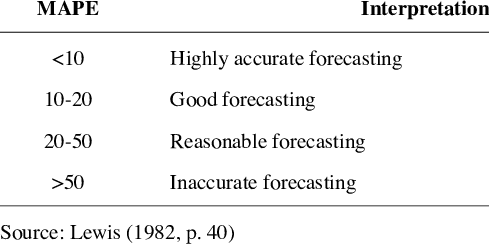

In [229]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,10 days,45.282321,6.729214,5.834822,0.026894,0.022989,0.027159,0.821429
1,11 days,41.000241,6.403143,5.567528,0.025735,0.020448,0.025970,0.857143
2,13 days,39.596254,6.292555,5.479727,0.025245,0.019348,0.025496,0.857143
3,14 days,72.155505,8.494440,6.811358,0.030884,0.020563,0.031477,0.785714
4,15 days,87.938086,9.377531,7.446637,0.033736,0.020563,0.034464,0.785714
...,...,...,...,...,...,...,...,...
73,96 days,1270.938189,35.650220,29.566300,0.174502,0.100586,0.158044,0.535714
74,97 days,1387.062833,37.243292,31.007454,0.184674,0.120865,0.165781,0.500000
75,98 days,1574.581638,39.680998,33.411837,0.201762,0.217149,0.178833,0.428571
76,99 days,1443.608972,37.994855,31.834183,0.191043,0.217149,0.170692,0.464286
